# 04 Adding Well Logs to Borehole

In this fourth tutorial, you will learn how to add well logs from LAS files and DLIS files to the borehole object. 

<div class="alert alert-block alert-success">
<b>In this tutorial, you will learn the following:</b> <br>
- How to add well logs stored as LAS/DLIS files to the borehole <br>
- How to plot the well logs <br>

</div>

## Contents
1. [Importing Libraries](#importing_libraries)
2. [Creating a new Borehole object](#creating_borehole_object)
3. [Adding Well Logs](#add_well_logs)
4. [Inspecting the logs](#inspecting_logs)
5. [Inspecting the different curves](#inspecting_curves)
6. [Inspecting the Well Header](#inspecting_well_header)
7. [Plotting all well logs](#plotting_all_well_logs)
8. [Plotting Gamma Ray Logs](#plotting_gamma_ray_logs)

<a id='importing_libraries'></a>
## Importing Libraries
First, we import the `pyborehole` package and check out the version that is installed. For convenience, we are importing the `Borehole` class from the `borehole` module using `from pyborehole.borehole import Borehole`. 

In [1]:
import pyborehole
from pyborehole.borehole import Borehole
pyborehole.__version__

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'v0.0.post18'

<a id='creating_borehole_object'></a>
## Creating a new Borehole object

A new `Borehole` object can be initiated by providing the name of the borehole. The name of the borehole can also be accessed as attribute

In [2]:
borehole = Borehole(name='RWE EB1')
borehole

Borehole: RWE EB1

In [3]:
borehole.init_properties(location=(6.313031, 50.835676), 
                         crs='EPSG:4326', 
                         altitude_above_sea_level=136)

<a id='add_well_logs'></a>

##  Adding Well Logs
Similar to `welly`, `pyborehole` allows the user to load well logs and displaying them. Here, the `lasio` library is utilized.

In [4]:
borehole.add_well_logs('../../../data/0702492023_DataControl_EM.las')

<a id='inspecting_logs'></a>

## Inspecting the Logs

The logs can be inspected as Pandas DataFrame accessing them via the `df` attribute of the `logs` object.

In [5]:
borehole.logs.df

,DEPTH,BHT,DTEMP,CONDUCTIVITY,RMUD,CHT,CALIPER,ZCOR,ZDNC,PEFC,...,RILDC,RILMCX10,RILDCX10,SGR,TH,U,K,KTH,DIP,AZI
0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.6514,1.8866,0.4018,0.2414,10.0240,0.0,0.0
1,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.5465,2.1613,0.4206,0.2562,11.1502,0.0,0.0
2,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.4666,2.4533,0.4397,0.2698,12.3127,0.0,0.0
3,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.3323,2.7352,0.4601,0.2800,13.3879,0.0,0.0
4,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.2159,3.0101,0.4869,0.2895,14.4282,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99.80,NaN,NaN,NaN,NaN,NaN,171.7482,0.2540,2.4586,3.0071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1996,99.85,NaN,NaN,NaN,NaN,NaN,171.7482,0.2468,2.4558,3.0212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1997,99.90,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1998,99.95,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


<a id='inspecting_curves'></a>

## Inspecting the different curves

The `curves` attribute provides information about the different measured logs.

In [6]:
borehole.logs.curves

,original_mnemonic,mnemonic,descr,unit
0,DEPT,DEPT,Borehole Depth,M
1,BHT,BHT,Borehole Temperature,degC
2,DTEMP,DTEMP,Differential Temperature,degC
3,CONDUCTIVITY,CONDUCTIVITY,Mud Conductivity,mS/cm
4,RMUD,RMUD,Mud resistivity,Ohmm
5,CHT,CHT,Cable Head Tension,kgf
6,CALIPER,CALIPER,Borehole Caliper,MM
7,ZCOR,ZCOR,Density Correction from Pe-Density,g/ccm
8,ZDNC,ZDNC,Caliper corrected density from Pe-Density,g/ccm
9,PEFC,PEFC,Borehole and formation corrected PE,b/e


<a id='inspecting_well_header'></a>

## Inspecting the Well Header

The `header` and `params` attributes provides information about the well. 

In [7]:
borehole.logs.well_header

,mnemonic,unit,value,descr
0,STRT,M,100.0,Log Start Depth
1,STOP,M,0.05,Log Stop Depth
2,STEP,M,-0.05,Log Increment
3,NULL,,-999.25,Null Value
4,COMP,,RWE Power,Company Name
5,WELL,,EB 1,Well Name
6,FLD,,KW Weisweiler,Field Name
7,LOC,,,Location
8,PROV,,,Province
9,SRVC,,,Service Company


In [8]:
borehole.logs.params

,mnemonic,unit,value,descr
0,BHT,,20 degC,BHT
1,CVL,,5350 m/s,CasingVelocity
2,CTRY,,NRW,Country
3,FLVT,,1500 m/s,FluidVelocity
4,LMFI,,0.6 G,MFieldIntensity
5,MUDD,,1.0 g/ccm,MudWeight
6,RECORDED,,Krämer,Engineer's Name
7,RUN,,1,Run Number
8,TIME,,20:59:35,Time
9,WITTNESS,,Herr Mamonov,Witness's Name


<a id='plotting_all_well_logs'></a>
## Plotting all logs

The well logs can be plotted using the `plot_well_logs` function of the `logs` object.

(-10.0, 550.0)

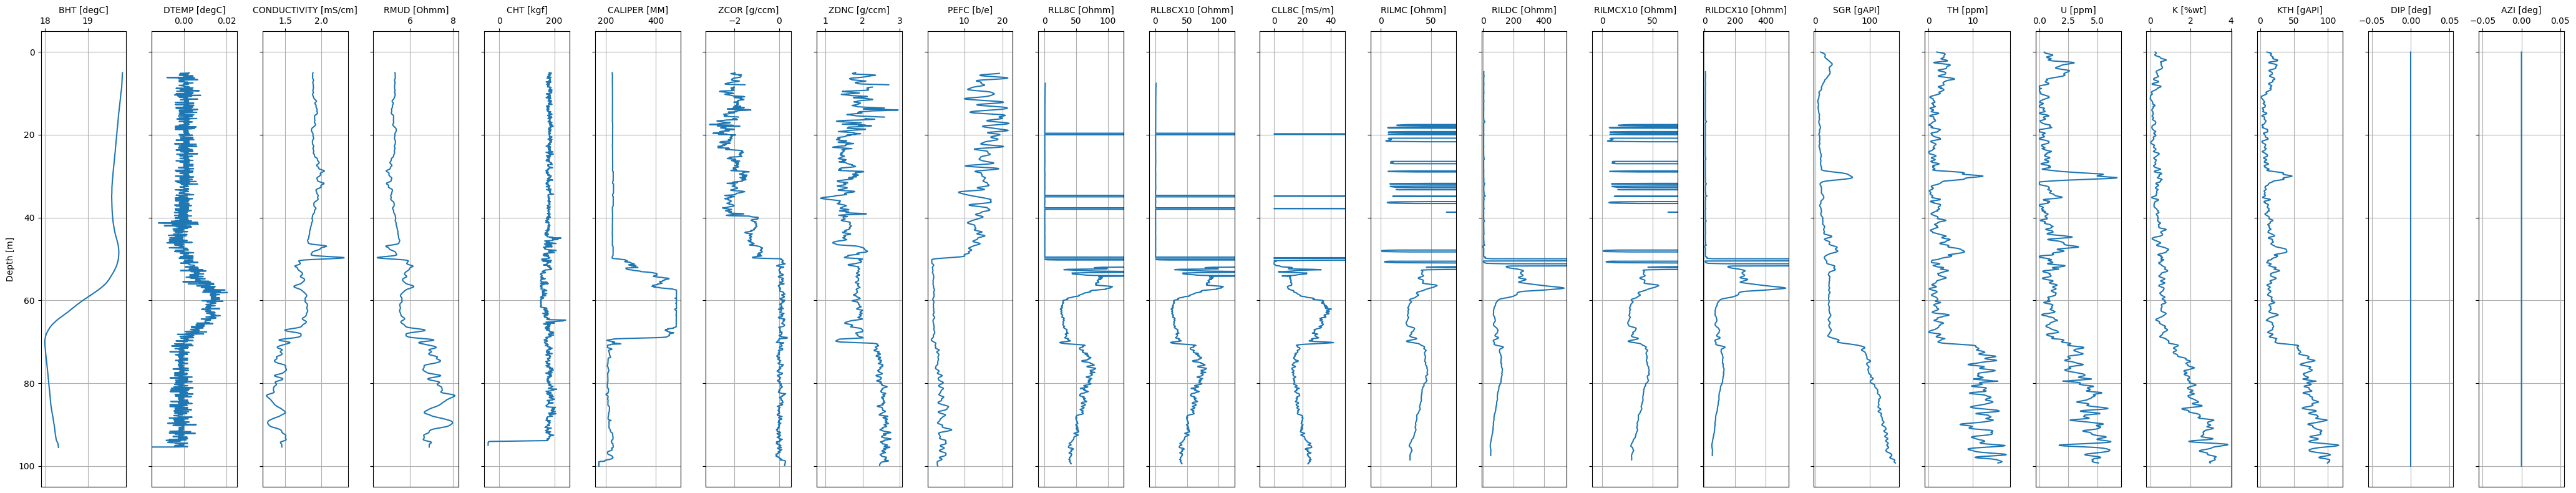

In [9]:
fig, ax = borehole.logs.plot_well_logs(tracks=['BHT', 
                                               'DTEMP',
                                               'CONDUCTIVITY', 
                                               'RMUD', 
                                               'CHT', 
                                               'CALIPER',	
                                               'ZCOR', 
                                               'ZDNC',	
                                               'PEFC',
                                               'RLL8C', 
                                               'RLL8CX10', 
                                               'CLL8C', 
                                               'RILMC', 
                                               'RILDC',
                                               'RILMCX10', 
                                               'RILDCX10', 
                                               'SGR', 
                                               'TH', 
                                               'U', 
                                               'K', 
                                               'KTH', 
                                               'DIP',
                                               'AZI'], depth_column='DEPTH')

ax[0].set_ylabel('Depth [m]')
ax[1].set_xlim(-0.015, 0.025)
ax[9].set_xlim(-10,125)
ax[10].set_xlim(-10,125)
ax[11].set_xlim(-10,50)
ax[12].set_xlim(-10,75)
ax[13].set_xlim(-10,550)
ax[14].set_xlim(-10,75)
ax[15].set_xlim(-10,550)

<a id='plotting_gamma_ray_logs'></a>
## Plotting Gamma Ray Logs

Plots can also be customized. Here, we only plot the Gamma Ray curves in different colors and fill the Spectral Gamma Ray Curve by specifying to fill the `0`th axis. 

Text(48.347222222222214, 0.5, 'Depth [m]')

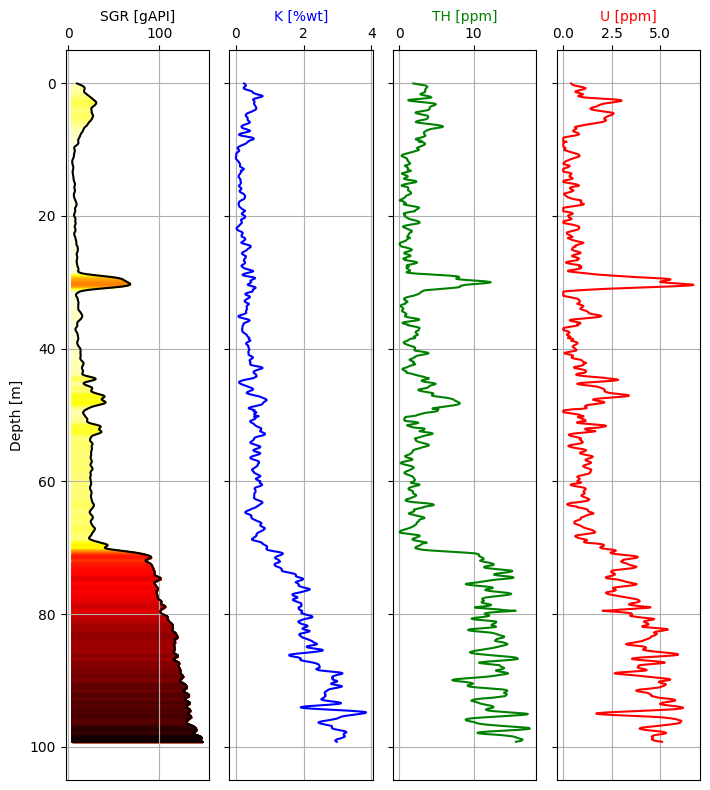

In [10]:
fig, ax = borehole.logs.plot_well_logs(tracks=['SGR', 
                                               'K',
                                               'TH', 
                                               'U',  
                                               ], depth_column='DEPTH', colors=['black', 'blue', 'green', 'red'], add_well_tops=False, fill_between=0)
ax[0].set_ylabel('Depth [m]')

<a id='adding_well_design'></a>

## Adding the well design to the plots. 

In [11]:
borehole.add_well_design()

In [12]:
borehole.well_design.add_pipe(name='Conductor Casing', 
                              pipe_type='conductor casing', 
                              top=0, 
                              bottom=100, 
                              depth_unit='m', 
                              inner_diameter=round(140/25.4,1), 
                              outer_diameter=round(150/25.4,1), 
                              diameter_unit='in',
                              shoe_height=3,
                              shoe_width=2,
                              shoe_unit='in')

In [13]:
borehole.well_design.add_cement(name='Cement 1',
                                top=0.5,
                                bottom=100,
                                pipe_inner='Conductor Casing',
                                pipe_outer='Conductor Casing',
                                depth_unit='m')

In [14]:
borehole.has_well_design

True

Text(48.347222222222214, 0.5, 'Depth [m]')

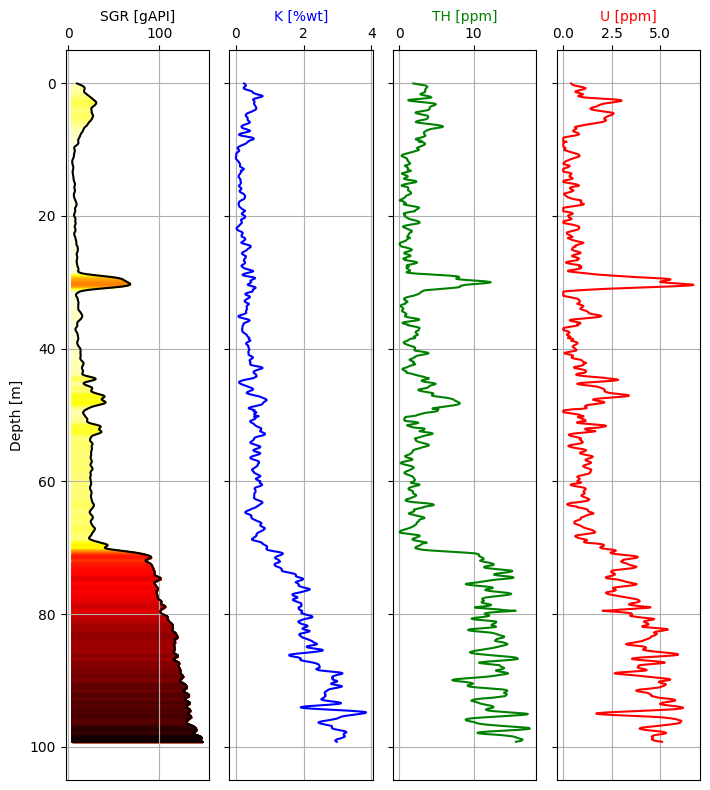

In [15]:
fig, ax = borehole.logs.plot_well_logs(tracks=['SGR', 
                                               'K',
                                               'TH', 
                                               'U',  
                                               ], depth_column='DEPTH', colors=['black', 'blue', 'green', 'red'], add_well_tops=False, 
                                       add_well_design=False,
                                       fill_between=0)
ax[0].set_ylabel('Depth [m]')